In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# files =[ "432 0.33C 25deg", "434 1c 25deg", "310 0.33C 25deg", "383 1C 25deg" ] 
# files = [f"../data/b0_sample/processed/{fn}__extradata.csv" for fn in files]

In [3]:
dirc = "../data/b0_sample/processed/"
files = glob.glob(dirc + "*caploss*")
files

['../data/b0_sample/processed\\172_caploss.csv',
 '../data/b0_sample/processed\\310 0.33C 25deg_caploss.csv',
 '../data/b0_sample/processed\\383 1C 25deg_caploss.csv',
 '../data/b0_sample/processed\\412_caploss.csv',
 '../data/b0_sample/processed\\432 0.33C 25deg_caploss.csv',
 '../data/b0_sample/processed\\434 1c 25deg_caploss.csv',
 '../data/b0_sample/processed\\507_caploss.csv',
 '../data/b0_sample/processed\\HA212_00058__1-11-3-P73B__45oC__Cby3__2.75-4.20__20180615171240_caploss.csv',
 '../data/b0_sample/processed\\HA212_00109__1-11-4-P73B__45oC__Cby3__2.75-4.20__20180615171320_caploss.csv']

<IPython.core.display.Javascript object>

In [5]:
dflist = []
for f in files[:-2]:
    df = pd.read_csv(f)
    dflist.append(df)

<IPython.core.display.Javascript object>

In [6]:
loss = "Cap Loss"

<IPython.core.display.Javascript object>

361
297
798
146
361
947
147


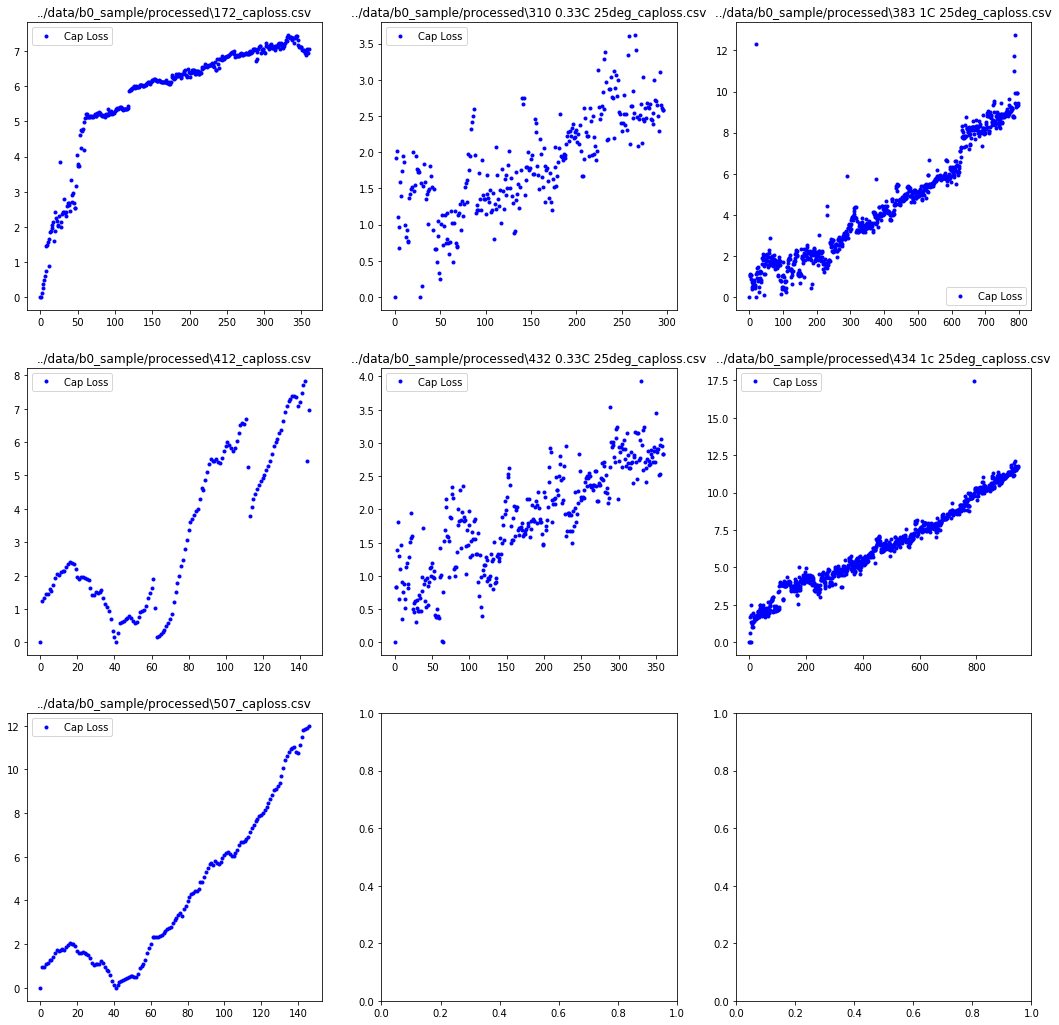

<IPython.core.display.Javascript object>

In [7]:
fig, ax_array = plt.subplots(3, 3, figsize=(18, 18))
axes = ax_array.flatten()
for i, cell_df in enumerate(dflist):
    print(len(cell_df))
    cell_df[loss].plot(
        kind="line", legend=loss, title=f"{files[i]}", ax=axes[i], style="b."
    )

In [ ]:
#previous one

# filter out outliers

In [ ]:
fig,ax_array = plt.subplots(4,2, figsize=(18,18))
axes = ax_array.flatten()
for i,cell_df in enumerate(dflist):
    discap_df =cell_df[dcap].copy()
    print(len(discap_df))
    dmax = discap_df.max()
    outlier = discap_df < 0.7* dmax
    shift_discap = discap_df.shift(1)
    discap_df[outlier] = shift_discap[outlier]
    print("discap df", len(discap_df))
    print("shift  df", len(shift_discap))
    discap_df.plot(kind='line',
                       legend=dcap,
#                      title=f"{files[i][16:20]}",
                       title=f"{files[i]}",ax = axes[i]
                      )
#     cell_df[cyc].plot( kind='line' , legend=cyc, ax = axes[i])

# Filter out knee values

In [57]:
fnames = ["412", "507"]
csv_dirc = ( r"..\data\b0_sample\processed"  )
dirc = r"..\data\b0_sample\processed\temp"
delete_from_cycles = [147,148]
for i,f in enumerate(fnames):
    summary = pd.read_csv(f"{dirc}/{f}_caploss.csv")
    tsdata = pd.read_csv(f"{dirc}/{f}_expdata.csv")
    filter_loc = delete_from_cycles[i]
    change_cycle = np.ediff1d(tsdata.cycle_index.values,to_begin=1) > 0.99
    cumcycles = np.cumsum(change_cycle)
    location = np.where(cumcycles == filter_loc+1)[0][0]
    print(f'{len(tsdata)}, localtion:{location}')
    tsdata_filtered = tsdata.iloc[:location]
    summary_filtered = summary.iloc[:filter_loc-1]
    tsdata_filtered.to_csv(f'{csv_dirc}/{f}_expdata.csv', index=False)
    summary_filtered.to_csv(f'{csv_dirc}/{f}_caploss.csv', index=False)

228783, localtion:175396
220737, localtion:174072


In [58]:
summary_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 1 columns):
Cap Loss    147 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


# coarsen data 

In [30]:
import shutil

In [33]:
fnames = ["412", "507" ]
resolutions = [6,12, 20 ]
csv_dirc = ( r"..\data\b0_sample\processed\low_res"  )
dirc = r"..\data\b0_sample\processed"
for i,f in enumerate(fnames):
    fullres_df = pd.read_csv(f"{dirc}/{f}_expdata.csv")
    shutil.copy(f'{dirc}/{f}_caploss.csv',f'{csv_dirc}/{f}_caploss.csv',)
    shutil.copy(f'{dirc}/{f}_expdata.csv',f'{csv_dirc}/{f}_expdata.csv',)
    for r in resolutions:
        low_res_df = fullres_df.iloc[::r]
        low_res_df.to_csv(f'{csv_dirc}/{f}_{r}_expdata.csv', index=False)
        shutil.copy(f'{dirc}/{f}_caploss.csv',f'{csv_dirc}/{f}_{r}_caploss.csv',)

In [61]:
highres_df = pd.DataFrame(np.arange(10*len(fullres_df)))
highres_df.head()

0
0  0
1  1
2  2
3  3
4  4

In [62]:
cols = fullres_df.columns
for i in  range(len(cols)):
    highres_df[cols[i]]= np.nan
    highres_df.iloc[::10,i+1] = fullres_df.iloc[:,i]
highres_df.head()

0    I  SOC  Charge_thr  Tot_thr    Temp  Time [Hr]  cycle_index
0  0  0.0  0.0         0.0      0.0  277.55    32.3725          9.0
1  1  NaN  NaN         NaN      NaN     NaN        NaN          NaN
2  2  NaN  NaN         NaN      NaN     NaN        NaN          NaN
3  3  NaN  NaN         NaN      NaN     NaN        NaN          NaN
4  4  NaN  NaN         NaN      NaN     NaN        NaN          NaN

In [63]:
highres_df.drop([0],axis=1,inplace=True)
highres_df.head()

I  SOC  Charge_thr  Tot_thr    Temp  Time [Hr]  cycle_index
0  0.0  0.0         0.0      0.0  277.55    32.3725          9.0
1  NaN  NaN         NaN      NaN     NaN        NaN          NaN
2  NaN  NaN         NaN      NaN     NaN        NaN          NaN
3  NaN  NaN         NaN      NaN     NaN        NaN          NaN
4  NaN  NaN         NaN      NaN     NaN        NaN          NaN

In [64]:
highres_df.interpolate(inplace=True)

In [68]:
highres_df.sample(n=10)

I       SOC  Charge_thr    Tot_thr    Temp   Time [Hr]  cycle_index
207903   0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
1036438  0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
1484473  0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
1030885  0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
322859   0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
1465994  0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
1171076  0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
935319   0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
1204673  0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0
1668546  0.0  0.259753    8986.973  17944.031  277.05  900.090556          3.0

In [67]:
highres_df.to_csv(f'{csv_dirc}/{f}_10x_expdata.csv',index=False)
shutil.copy(f'{dirc}/{f}_caploss.csv',f'{csv_dirc}/{f}_10x_caploss.csv',)

'..\\data\\b0_sample\\processed\\low_res/507_10x_caploss.csv'

In [60]:
highres_df.head()

SOC  Charge_thr  Tot_thr  Temp  Time [Hr]  cycle_index    I
0  NaN         NaN      NaN   NaN        NaN          NaN  9.0
1  NaN         NaN      NaN   NaN        NaN          NaN  9.1
2  NaN         NaN      NaN   NaN        NaN          NaN  9.2
3  NaN         NaN      NaN   NaN        NaN          NaN  9.3
4  NaN         NaN      NaN   NaN        NaN          NaN  9.4

In [50]:
len(highres_df) - highres_df.count()

0                    0
I                    0
SOC                  0
Charge_thr           0
Tot_thr              0
Temp                 0
Time [Hr]            0
cycle_index    1740720
dtype: int64

# verify temperature in expdata files

In [3]:
dirc = '../data/b0_sample/processed/'
files = glob.glob(dirc +'*expdata*')
files

['../data/b0_sample/processed\\172_expdata.csv',
 '../data/b0_sample/processed\\310 0.33C 25deg_expdata.csv',
 '../data/b0_sample/processed\\383 1C 25deg_expdata.csv',
 '../data/b0_sample/processed\\412_expdata.csv',
 '../data/b0_sample/processed\\432 0.33C 25deg_expdata.csv',
 '../data/b0_sample/processed\\434 1c 25deg_expdata.csv',
 '../data/b0_sample/processed\\507_expdata.csv',
 '../data/b0_sample/processed\\HA212_00058__1-11-3-P73B__45oC__Cby3__2.75-4.20__20180615171240_expdata.csv',
 '../data/b0_sample/processed\\HA212_00109__1-11-4-P73B__45oC__Cby3__2.75-4.20__20180615171320_expdata.csv']

In [4]:
dflist = []
for f in files:
    df = pd.read_csv(f)
    dflist.append(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131866 entries, 0 to 131865
Data columns (total 7 columns):
I              131866 non-null float64
SOC            131866 non-null float64
Charge_thr     131866 non-null float64
Tot_thr        131866 non-null float64
Temp           131866 non-null float64
Time [Hr]      131866 non-null float64
cycle_index    131866 non-null int64
dtypes: float64(6), int64(1)
memory usage: 7.0 MB


In [7]:
timecol = 'Time [Hr]'
current = 'I'
soc = 'SOC'

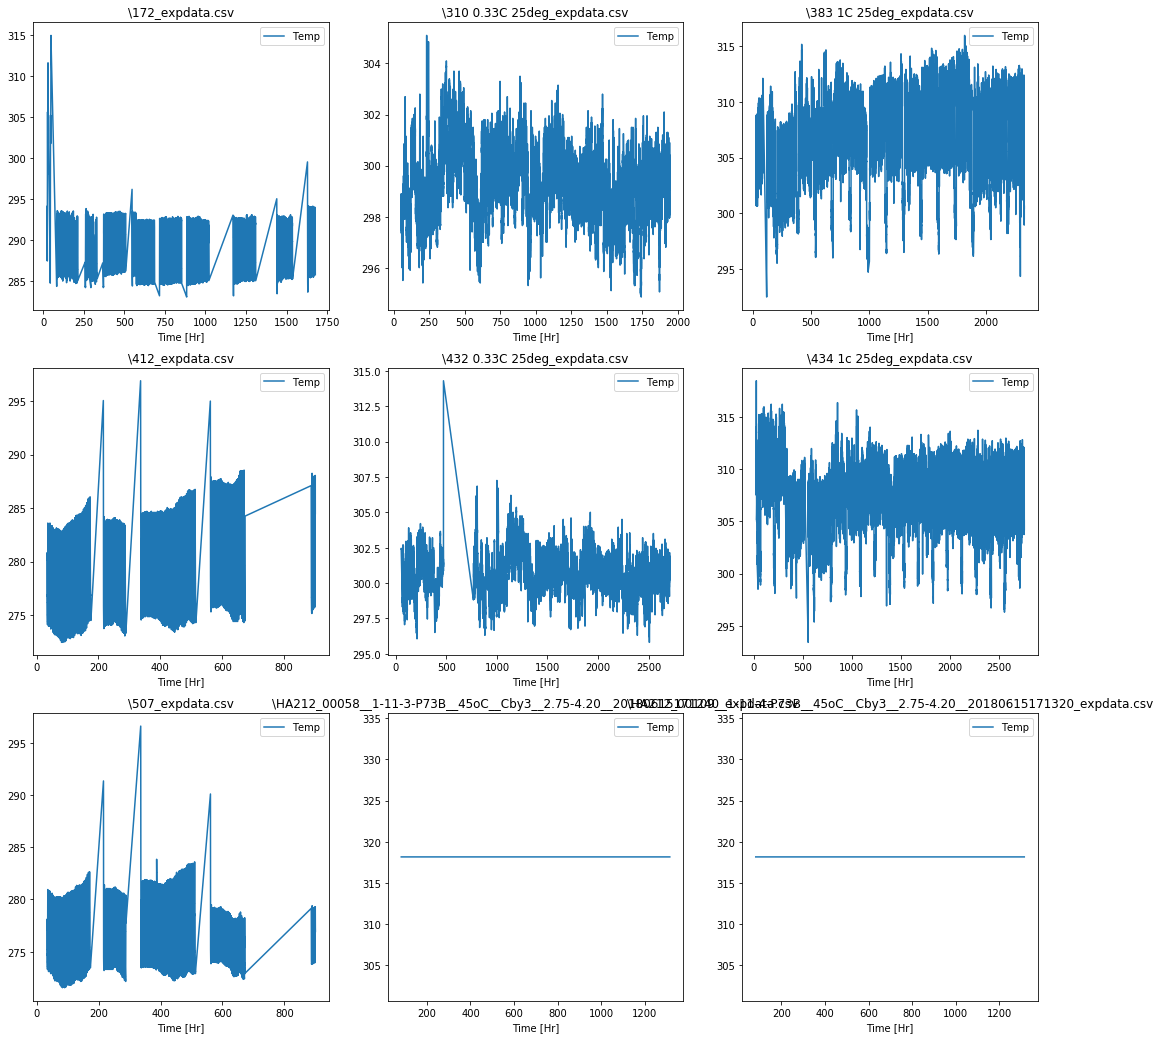

In [12]:
fig,ax_array = plt.subplots(3,3, figsize=(18,18))
axes = ax_array.flatten()
for i,cell_df in enumerate(dflist):
#     print(len(cell_df)),
    cell_df.plot( x = timecol, y = 'Temp',
                       legend='temperature',
                        title=f"{files[i].split('processed')[1][1:16]}",
                      )

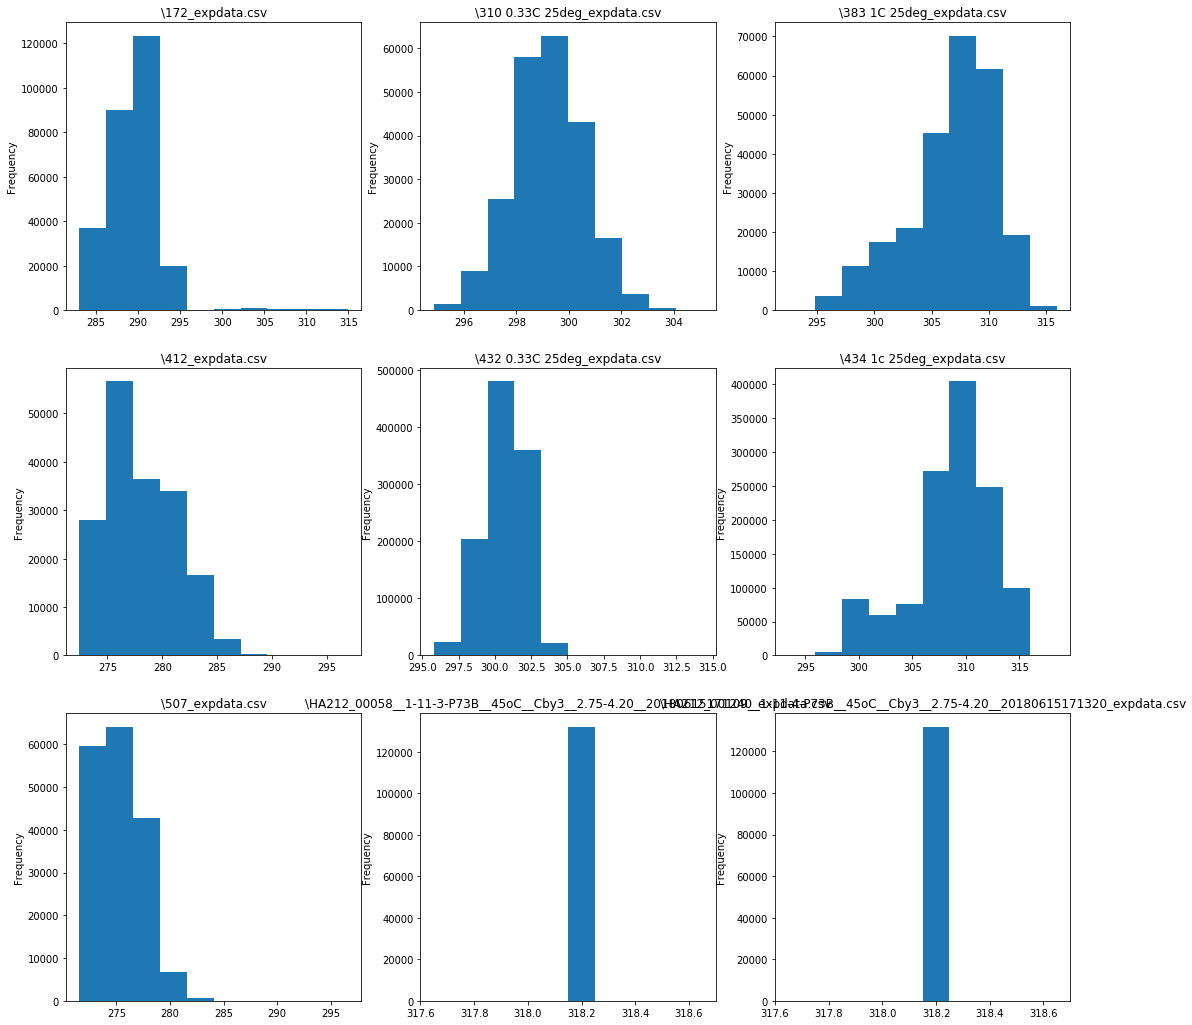

In [13]:
fig,ax_array = plt.subplots(3,3, figsize=(18,18))
axes = ax_array.flatten()
for i,cell_df in enumerate(dflist):
#     print(len(cell_df)),
    cell_df['Temp'].plot.hist(
        title=f"{files[i].split('processed')[1][1:16]}",
        ax = axes[i]
    )

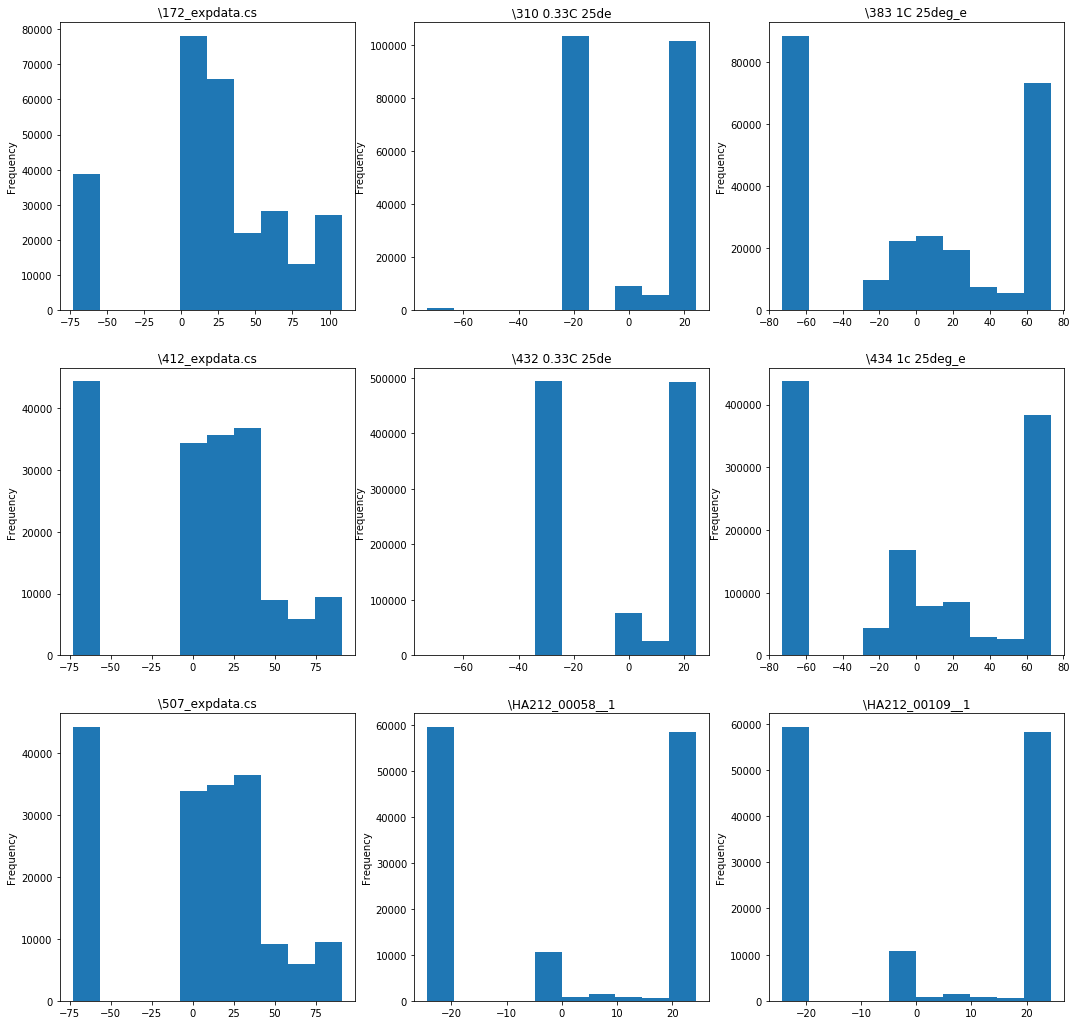

In [14]:
fig,ax_array = plt.subplots(3,3, figsize=(18,18))
axes = ax_array.flatten()
for i,cell_df in enumerate(dflist):
#     print(len(cell_df)),
    cell_df[current].plot.hist(
        title=f"{files[i].split('processed')[1][:15]}",
        ax = axes[i]
    )

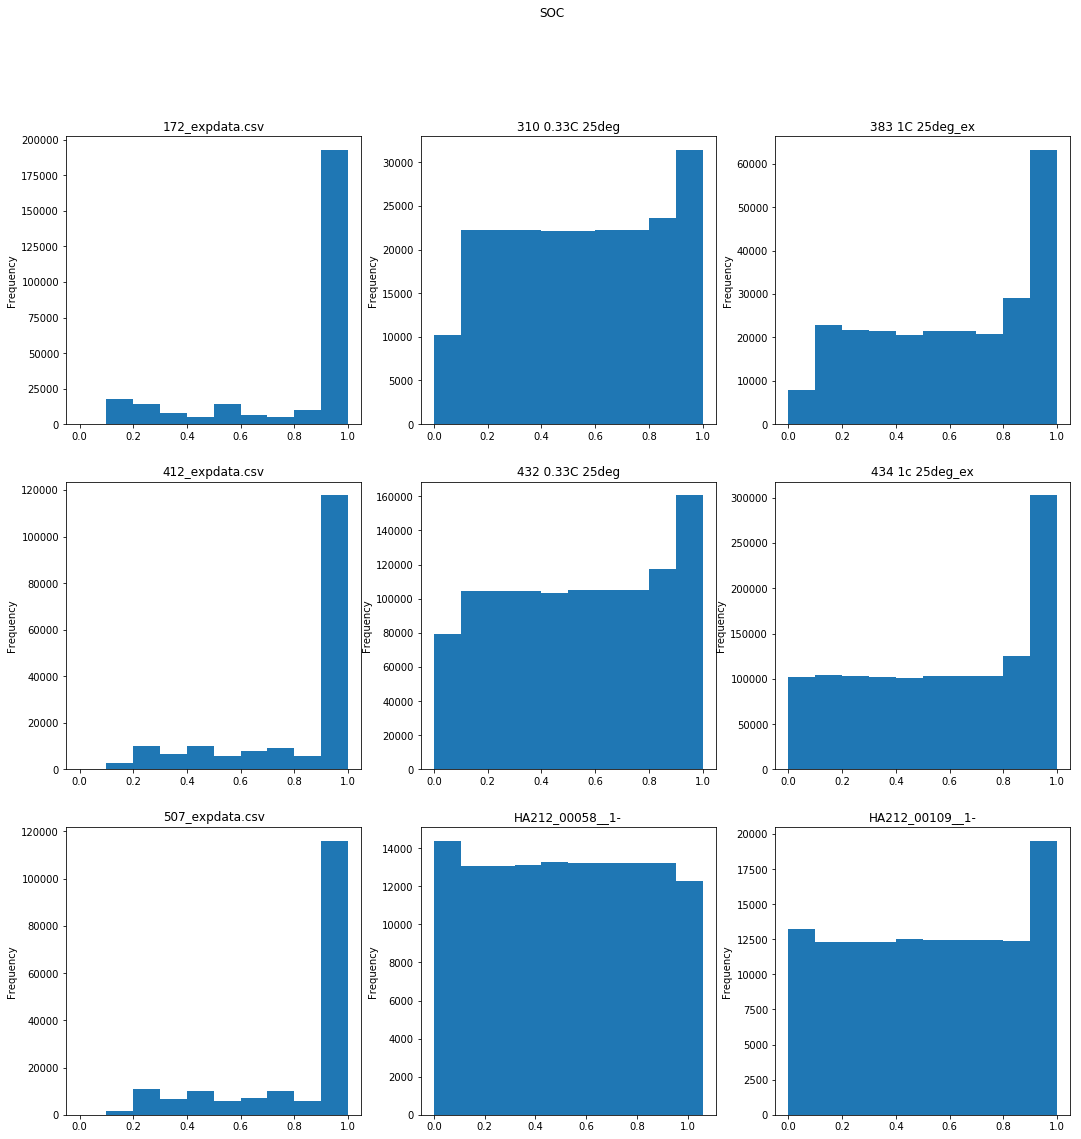

In [15]:
fig,ax_array = plt.subplots(3,3, figsize=(18,18))
axes = ax_array.flatten()
fig.suptitle('SOC')
for i,cell_df in enumerate(dflist):
#     print(len(cell_df)),
    cell_df[soc].plot.hist(
        title=f"{files[i].split('processed')[1][1:16]}",
        ax = axes[i]
    )

In [17]:
loc507 = 6
loc412 = 3
print(files[loc507])
print(files[loc412])

../data/b0_sample/processed\507_expdata.csv
../data/b0_sample/processed\412_expdata.csv


In [18]:
deg0list = [dflist[loc412], dflist[loc507]]

In [22]:
names = ["412", "507"]
dflist = []
for i,df in enumerate(deg0list):
    smalldf = df.iloc[::10].copy()
    smalldf['cell'] = names[i]
    dflist.append(smalldf)
    
    

In [24]:
pd.concat(dflist).to_csv("0deg.csv")

In [ ]:

    .to_csv(names[i] + '.csv')